# INFORM

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("INFORM.csv").convert_dtypes()

### Rows and columns 

In [3]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 41


In [4]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

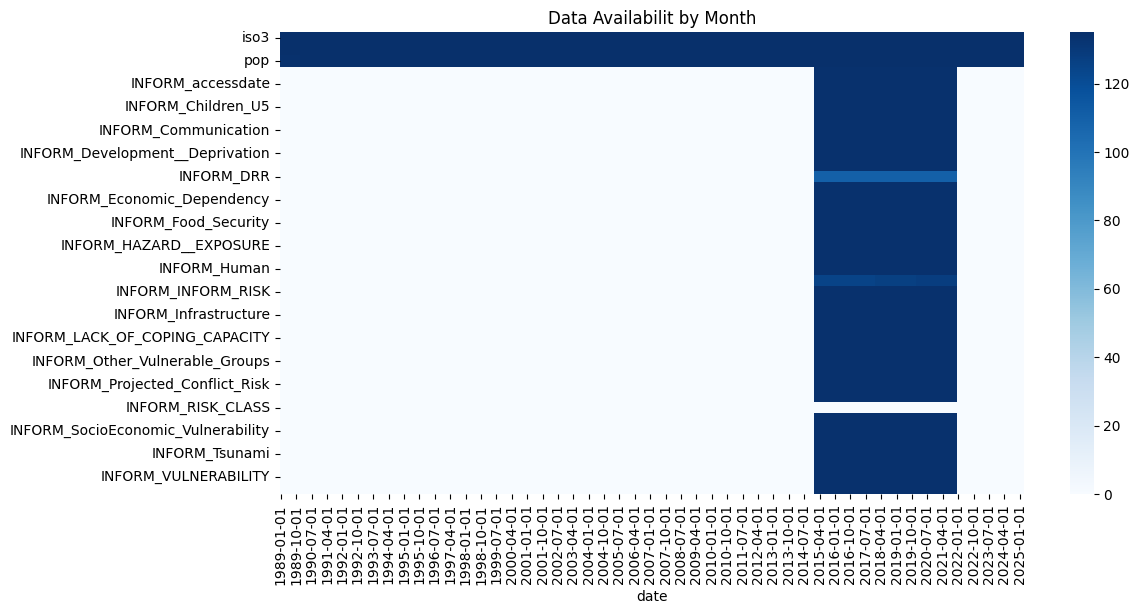

In [5]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

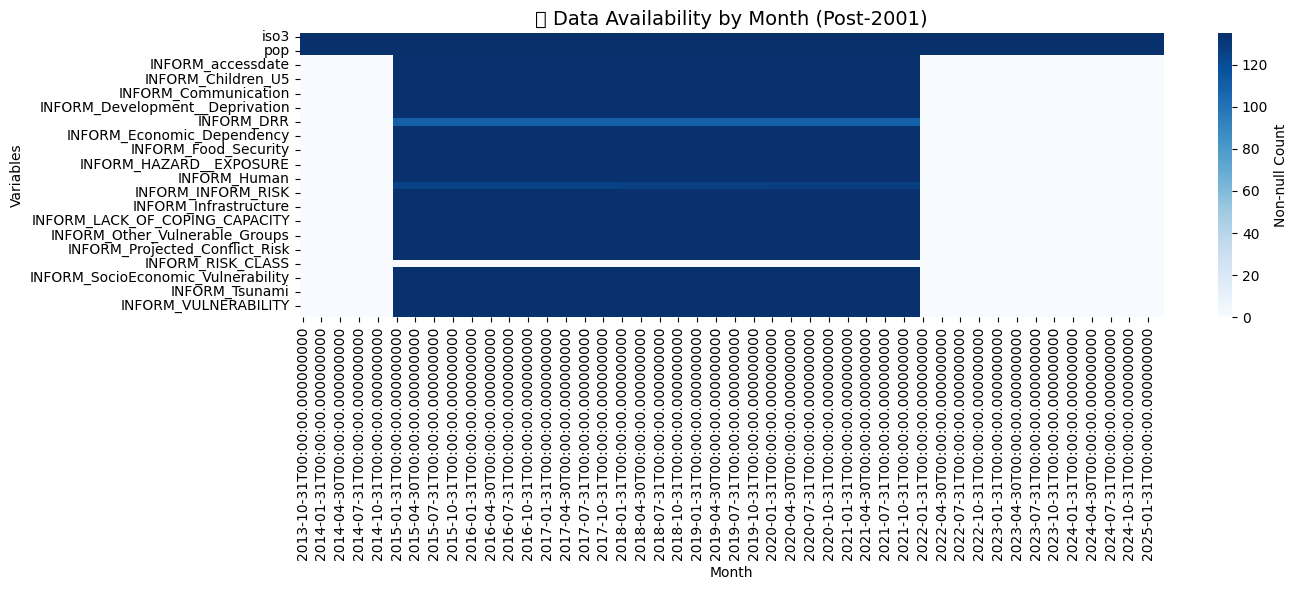

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('2013-10-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [10]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,DOM,SLB,DZA,LKA,ZWE
region_code,LAC,EAP,MNA,SAR,SSA
pop,11331265.0,800005.0,46164219.0,22037000.0,16340822.0
INFORM_Access_to_health_care,<NA>,<NA>,<NA>,<NA>,<NA>
INFORM_accessdate,<NA>,<NA>,<NA>,<NA>,<NA>
INFORM_archival,<NA>,<NA>,<NA>,<NA>,<NA>
INFORM_Children_U5,<NA>,<NA>,<NA>,<NA>,<NA>
INFORM_Coastal_flood,<NA>,<NA>,<NA>,<NA>,<NA>
INFORM_Communication,<NA>,<NA>,<NA>,<NA>,<NA>
INFORM_Current_Highly_Violent_Conflict_Intensity,<NA>,<NA>,<NA>,<NA>,<NA>


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18630 entries, 2013-10-01 to 2025-03-01
Data columns (total 40 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   iso3                                              18630 non-null  string 
 1   region_code                                       18630 non-null  string 
 2   pop                                               18630 non-null  Float64
 3   INFORM_Access_to_health_care                      11256 non-null  Float64
 4   INFORM_accessdate                                 11256 non-null  string 
 5   INFORM_archival                                   11256 non-null  boolean
 6   INFORM_Children_U5                                11256 non-null  Float64
 7   INFORM_Coastal_flood                              11256 non-null  Float64
 8   INFORM_Communication                              11256 non-null  Float64
 9   

### Descriptive statistics of categorical columns

In [12]:
df.describe(include='string').T

,count,unique,top,freq
iso3,18630,135,AFG,138
region_code,18630,6,SSA,6486
INFORM_accessdate,11256,7,2015-01-01,1608


### Descriptive statistics of numerical columns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,18630.0,48310000.413849,171310502.00142,9816.0,2480244.0,10690537.5,32355644.0,1438069596.0
INFORM_Access_to_health_care,11256.0,5.233156,1.994997,0.1,3.8,5.4,6.6,9.9
INFORM_Children_U5,11256.0,2.828785,2.020208,0.2,1.1,2.4,4.3,8.7
INFORM_Coastal_flood,11256.0,3.114179,2.759437,0.0,0.0,3.0,5.2,9.7
INFORM_Communication,11256.0,4.407889,2.183115,0.9,2.6,3.9,6.2,9.6
INFORM_Current_Highly_Violent_Conflict_Intensity,11256.0,1.689765,3.449562,0.0,0.0,0.0,0.0,10.0
INFORM_Development__Deprivation,11256.0,5.565352,2.644745,0.8,3.3,5.5,8.0,10.0
INFORM_Drought,11256.0,3.868977,2.311262,0.0,2.2,3.8,5.3,10.0
INFORM_DRR,9240.0,4.673377,1.676599,0.1,3.5,4.6,5.6,9.2
INFORM_Earthquake,11256.0,3.966098,3.389105,0.1,0.1,4.0,7.1,9.8


### Deatils of missing values in the features

In [14]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
INFORM_RISK_CLASS,18630,100.00
INFORM_DRR,9390,50.40
INFORM_Inequality,8010,43.00
INFORM_Access_to_health_care,7374,39.58
INFORM_Coastal_flood,7374,39.58
INFORM_Children_U5,7374,39.58
INFORM_archival,7374,39.58
INFORM_accessdate,7374,39.58
INFORM_INFORMYear,7374,39.58
INFORM_Infrastructure,7374,39.58


In [15]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [16]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

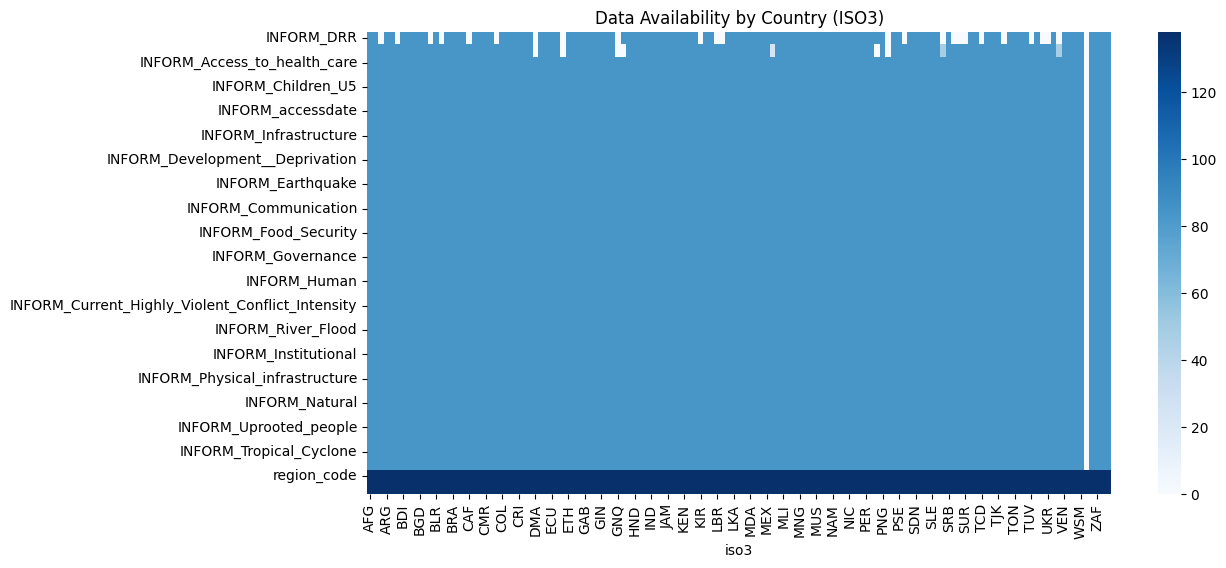

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

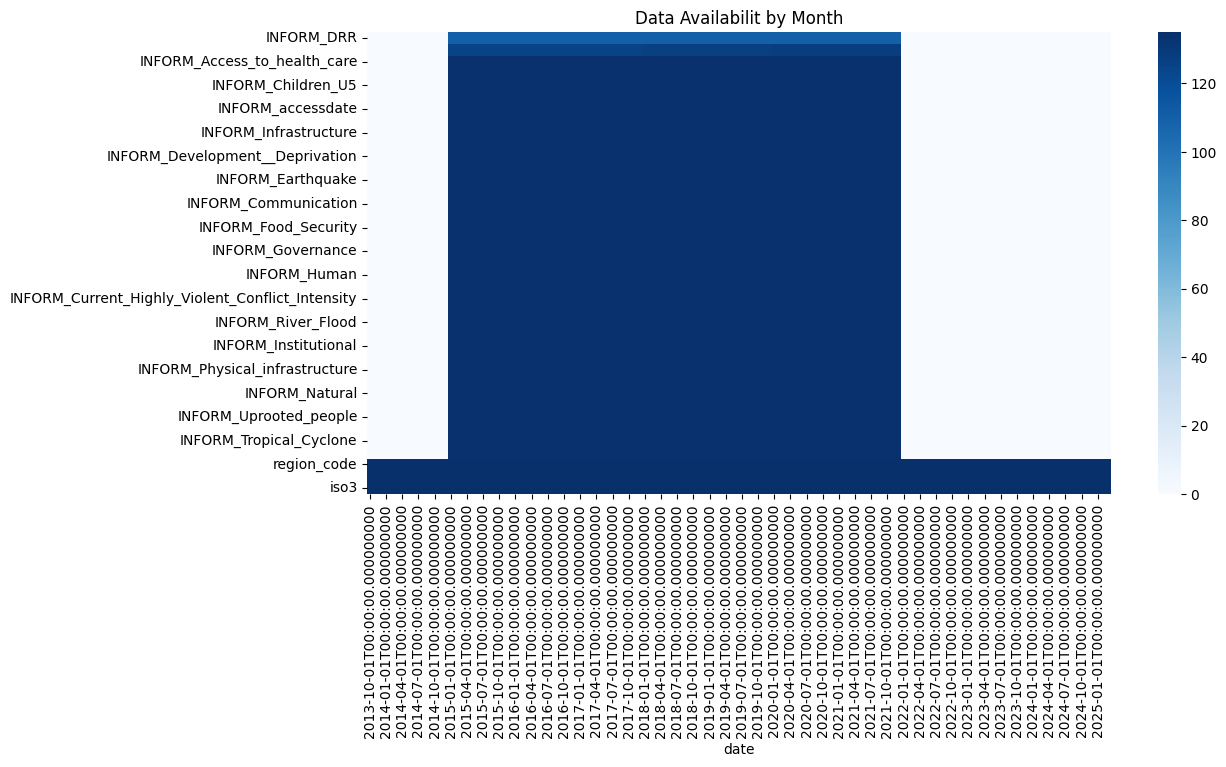

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [19]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

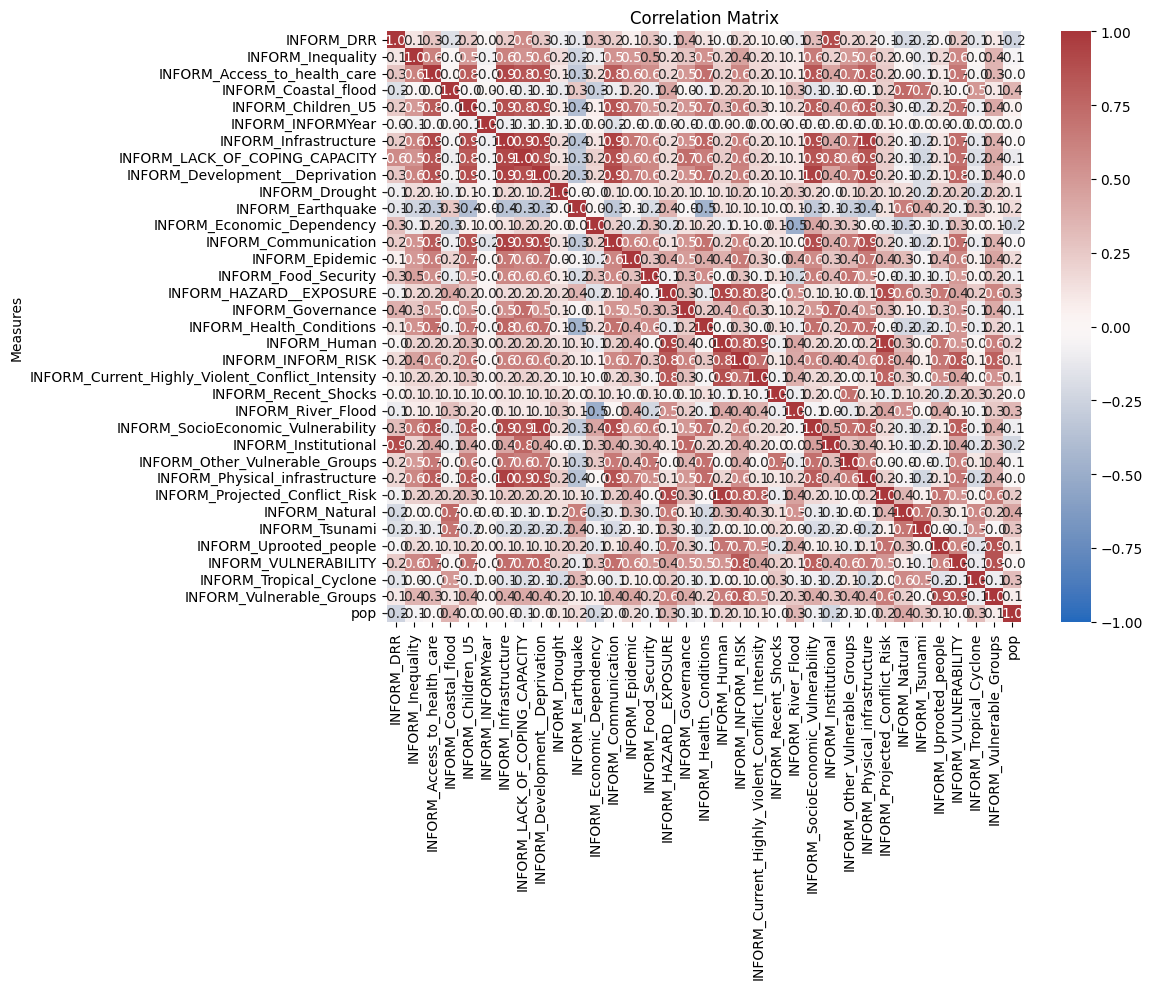

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [21]:
numeric_df.shape

(9012, 35)

### Principal Components Analysis of the features

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 6
Column names for PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [23]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [24]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

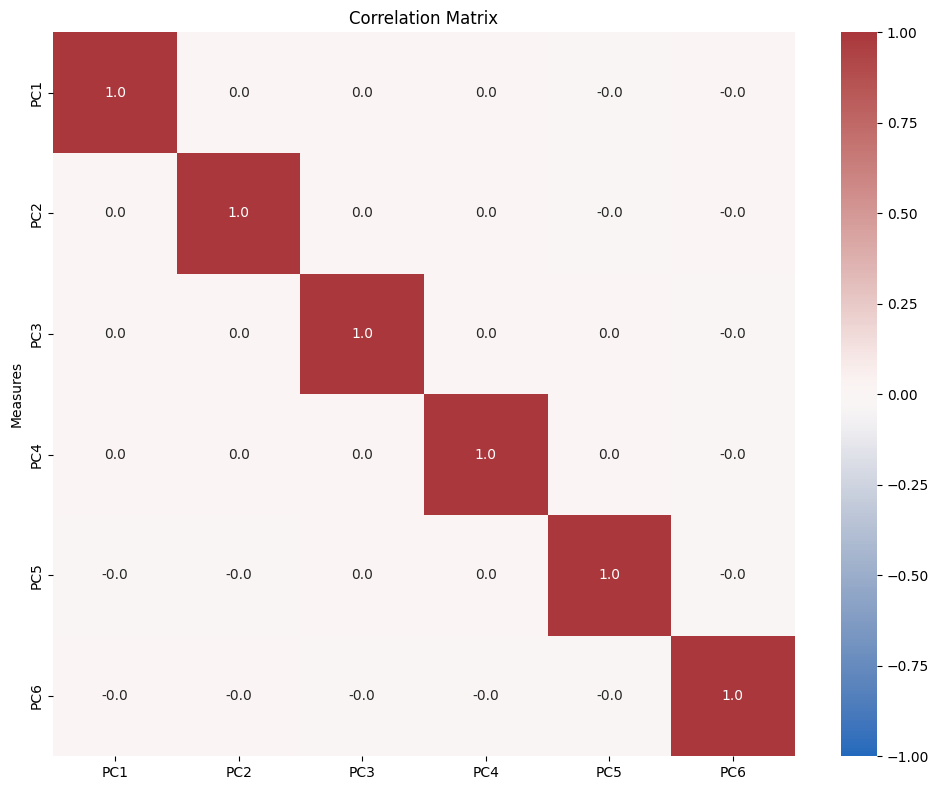

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

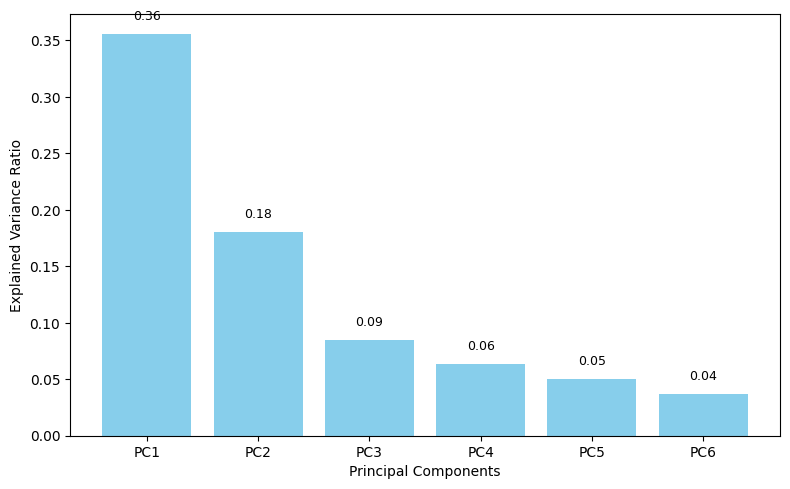

In [26]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 2: 0.5358


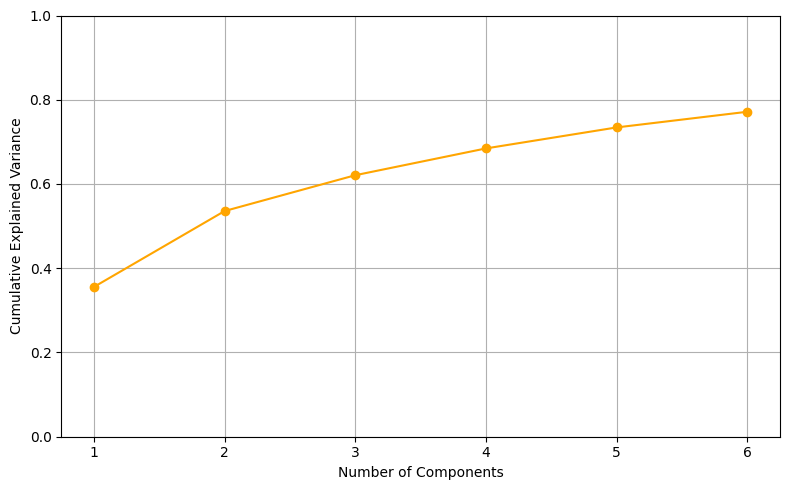

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 2 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

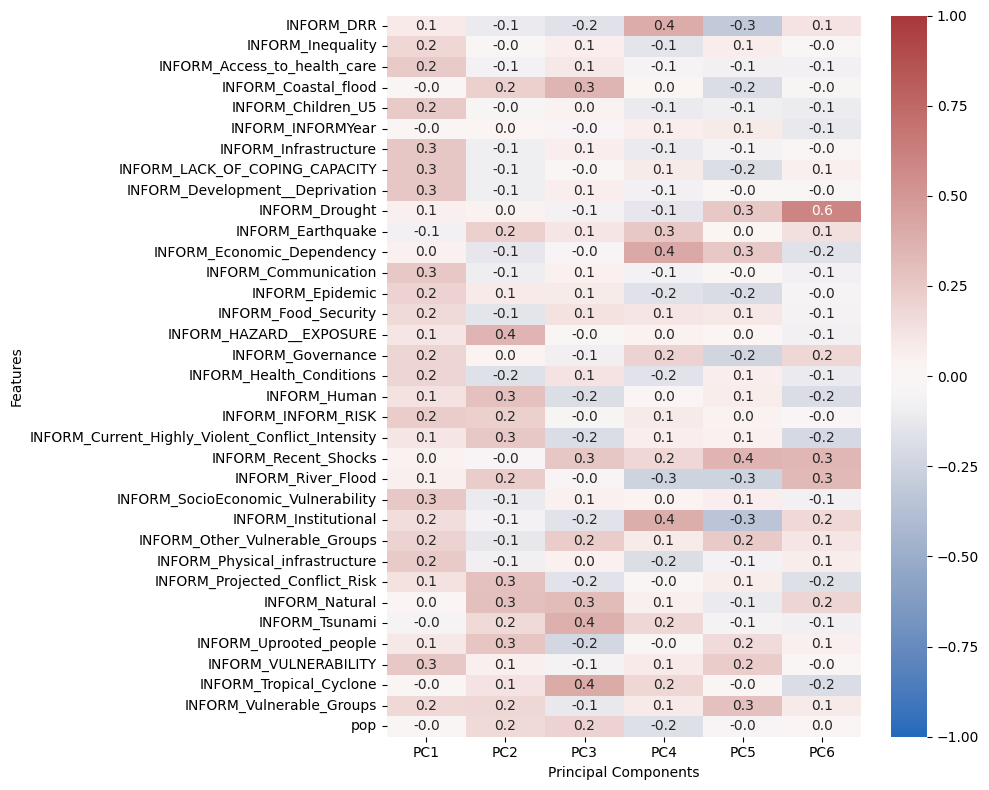

In [29]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [30]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                                                   PC1   PC2   PC3   PC4  \
INFORM_DRR                                        0.09 -0.11 -0.16  0.40   
INFORM_Inequality                                 0.18 -0.03  0.07 -0.14   
INFORM_Access_to_health_care                      0.25 -0.07  0.10 -0.05   
INFORM_Coastal_flood                             -0.00  0.22  0.35  0.02   
INFORM_Children_U5                                0.25 -0.04  0.04 -0.11   
INFORM_INFORMYear                                -0.01  0.02 -0.03  0.07   
INFORM_Infrastructure                             0.26 -0.09  0.07 -0.11   
INFORM_LACK_OF_COPING_CAPACITY                    0.26 -0.09 -0.03  0.08   
INFORM_Development__Deprivation                   0.26 -0.09  0.06 -0.08   
INFORM_Drought                                    0.06  0.04 -0.06 -0.14   
INFORM_Earthquake                                -0.07  0.21  0.11  0.25   
INFORM_Economic_Dependency                        0.05 -0.14 -0.

## Physical Interpretation

### PC1- Structural Vulnerability,Countries with long-term systemic development issues and weak institutional foundations.

### PC2-Natural Hazard & Conflict Exposure, Countries currently facing significant hazard exposure or conflict intensity.